In [1]:
import ROOT
import os

Welcome to JupyROOT 6.25/01


In [2]:
ROOT.gInterpreter.Declare("""
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include "TCanvas.h"
#include "TH1D.h"
#include "TFile.h"
#include "TH2D.h"
#include "TLatex.h"
#include "Math/Vector4D.h"
#include <Math/GenVector/PtEtaPhiM4D.h> 
#include "TStyle.h"
#include <map>

using namespace ROOT::VecOps;
using RNode = ROOT::RDF::RNode;

using rvec_f = const RVec<float> &;
using rvec_i = const RVec<int> &;
using rvec_b = const RVec<bool> &;

const float PT_CUT_JET= 30;

RVec<size_t> GoodJets(rvec_i jetId, rvec_f eta, rvec_f pt, rvec_i puId){
   RVec<int> idx;
   for (size_t i = 0; i < pt.size(); i++) {
      if (jetId[i] >= 2 && abs(eta[i]) < 5. && pt[i] > PT_CUT_JET && (pt[i] > 50. || (pt[i] <= 50. && puId[i] >= 7))) idx.emplace_back(i);
   }
   return idx;
}
""")

True

In [3]:
from dask.distributed import Client
client = Client()  # set up local cluster on your laptop
client

Client Scheduler: tcp://127.0.0.1:40605 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 4.29 GB


In [4]:
!wget https://cernbox.cern.ch/index.php/s/GhVAXXmSeA0FrN4/download -O test.root

--2021-09-10 16:13:09--  https://cernbox.cern.ch/index.php/s/GhVAXXmSeA0FrN4/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.32.38, 128.142.170.17, 128.142.53.35, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.32.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32094794 (31M) [application/root]
Saving to: ‘test.root’

100%[======================================>] 32,094,794  50.8MB/s   in 0.6s   

Last-modified header invalid -- time-stamp ignored.
2021-09-10 16:13:11 (50.8 MB/s) - ‘test.root’ saved [32094794/32094794]



Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


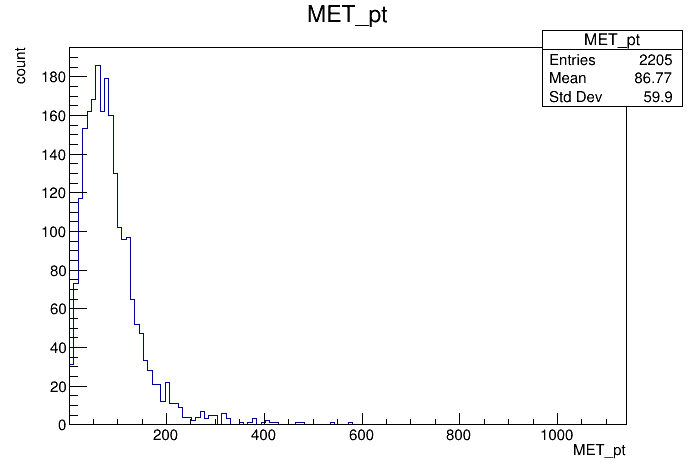

In [5]:
df = ROOT.RDataFrame("Events","test.root")

df_goodvertex = df.Filter("Flag_goodVertices && Flag_globalSuperTightHalo2016Filter", "Good vertex selection")
df_GoodJets = df_goodvertex.Define("GoodJets_idx", "GoodJets(Jet_jetId, Jet_eta, Jet_pt, Jet_puId)")
h = df_GoodJets.Histo1D("MET_pt")

c = ROOT.TCanvas()
h.Draw()
c.Draw()

/usr/local/share/root6/lib/DistRDF/HeadNode.py:392: UserWarning: Number of partitions is greater than number of clusters in the dataset. Using 1 partition(s)
  return Node.RangesBuilder(self)._get_clustered_ranges(self.treename, self.inputfiles, self._get_friend_info())


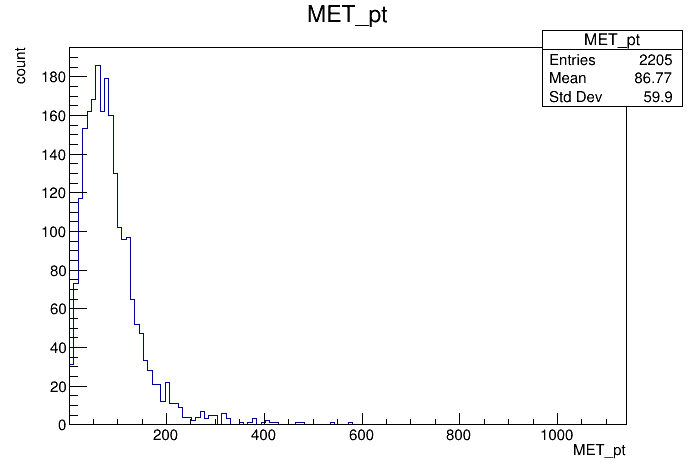

In [6]:
RDataFrame = ROOT.RDF.Experimental.Distributed.Dask.RDataFrame

df = RDataFrame("Events",
                "test.root",
                npartitions=2,
                daskclient=client)

df_goodvertex = df.Filter("Flag_goodVertices && Flag_globalSuperTightHalo2016Filter", "Good vertex selection")
h = df_goodvertex.Histo1D("MET_pt")

c = ROOT.TCanvas()
h.Draw()
c.Draw()

In [7]:
RDataFrame = ROOT.RDF.Experimental.Distributed.Dask.RDataFrame

df = RDataFrame("Events",
                "test.root",
                npartitions=2,
                daskclient=client)

df_goodvertex = df.Filter("Flag_goodVertices && Flag_globalSuperTightHalo2016Filter", "Good vertex selection")
df_GoodJets = df_goodvertex.Define("GoodJets_idx", "GoodJets(Jet_jetId, Jet_eta, Jet_pt, Jet_puId)")
h = df_GoodJets.Histo1D("MET_pt")

c = ROOT.TCanvas()
h.Draw()
c.Draw()

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


KilledWorker: ('mapper-c6c9723d-5272-4e62-85f6-3d8b4c5c054a', <Worker 'tcp://127.0.0.1:44809', name: 1, memory: 0, processing: 1>)

Error in <TTree::SetCacheEntryRange>: No cache is available. Could not set entry range
input_line_67:2:162: error: use of undeclared identifier 'GoodJets'
auto lambda1 = [](ROOT::VecOps::RVec<Int_t>& var0, ROOT::VecOps::RVec<Float_t>& var1, ROOT::VecOps::RVec<Float_t>& var2, ROOT::VecOps::RVec<Int_t>& var3){return GoodJets(var0, var1, var2, var3)
                                                                                                                                                                 ^
input_line_71:2:162: error: use of undeclared identifier 'GoodJets'
auto lambda1 = [](ROOT::VecOps::RVec<Int_t>& var0, ROOT::VecOps::RVec<Float_t>& var1, ROOT::VecOps::RVec<Float_t>& var2, ROOT::VecOps::RVec<Int_t>& var3){return GoodJets(var0, var1, var2, var3)
                                                                                                                                                                 ^
Error in <TClass::New>: cannot create object of class runtime_e